In [26]:
import pyrender
import trimesh
from pyrender import OffscreenRenderer
import numpy as np

In [27]:
#load
fuze_trimesh = trimesh.load('sample.glb')
scene = pyrender.Scene.from_trimesh_scene(fuze_trimesh)

In [28]:
for node in scene.nodes:
    node.name = "object"

In [29]:
#camera
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0)
node_camera = scene.add(camera)

In [30]:
#light
light = pyrender.DirectionalLight(color=np.ones(3), intensity=3.0)
node_light = scene.add(light)

In [31]:
def change_view(translation, rotation):
    # move
    position = [0, 1, 0]
    rotation = [0, 0, 0, 1]

    node_camera.translation = position
    node_camera.rotation = rotation
    node_light.translation = position
    node_light.rotation = rotation

    #render
    r = OffscreenRenderer(viewport_width=640*2, viewport_height=480*2)
    color, depth = r.render(scene)
    r.delete()
    
    #show
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20,20))
    plt.imshow(color)
    plt.show()

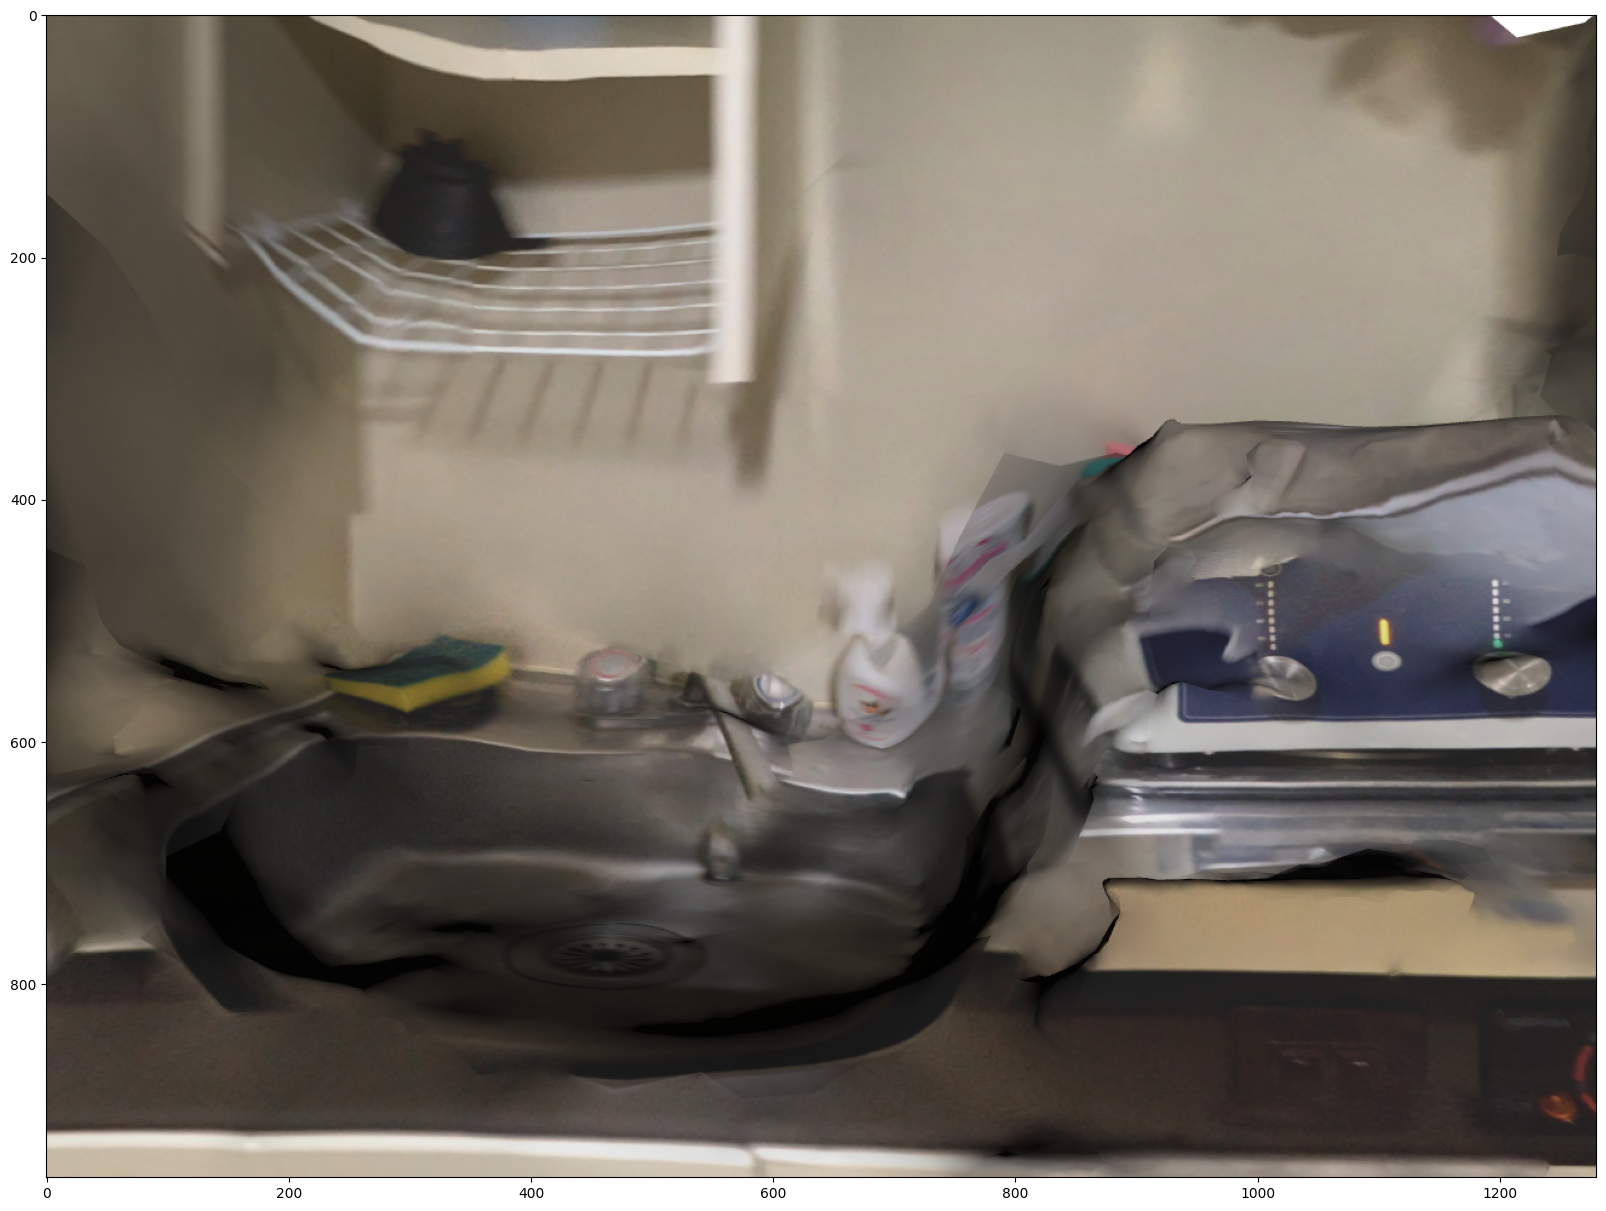

In [32]:
change_view([0, 1, 0], [0, 0, 0, 1])